In [2]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.set_palette('muted')

In [4]:
# Data from https://www.ebi.ac.uk/pride/archive/projects/PXD007647. 10 samples Escherichia coli; TMT 10

In [5]:
proteomicTxtFiles = [
    os.path.join('/PD_Out',f) for f in os.listdir(os.getcwd()+'/PD_Out') if f.endswith('.txt')
]
for f in proteomicTxtFiles:
    print(f)

/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_SpecializedTraces.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_MSMSSpectrumInfo.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_ProteinGroups.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_QuanSpectra.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_Proteins.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_PrSMs.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_InputFiles.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_PSMs.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_ResultStatistics.txt
/PD_Out/PXD007647_Reproc_TMT-set-2_8fracs_PeptideGroups.txt


In [ ]:
# File input

In [48]:
df1 = pd.read_csv(
os.getcwd() + [ n for n in proteomicTxtFiles if 'InputFiles' in n ][0],
    sep='\t'
)
print(df1.index)
df1['count'] = [1,] * df1.index
print(df1['count'])
print(df1.shape)
print(df1.columns)
df1.head(9)


RangeIndex(start=0, stop=9, step=1)
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
Name: count, dtype: int64
(9, 10)
Index(['Input Files Workflow ID', 'Input Files Workflow Level', 'Input Files ',
       'Study File ID', 'File Name', 'Creation Date', 'RT Range in min',
       'Instrument Name', 'Software Revision', 'count'],
      dtype='object')


,Input Files Workflow ID,Input Files Workflow Level,Input Files,Study File ID,File Name,Creation Date,RT Range in min,Instrument Name,Software Revision,count
0,5225,0,12455,NaN,C:\Data\PXD007647_Reproc\PD24\PXD007647_Reproc...,6/30/2021 1:54:35 PM,NaN,NaN,Created with Discoverer version: 2.4.0.305,0
1,-107,1,12447,F1.1,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_91.raw,6/2/2017 9:53:00 PM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,1
2,-107,1,12448,F1.2,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_92.raw,6/2/2017 11:38:09 PM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,2
3,-107,1,12449,F1.3,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_93.raw,6/3/2017 1:23:16 AM,0.00 - 90.01,Orbitrap Fusion,2.1.1565.23,3
4,-107,1,12450,F1.4,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_94.raw,6/3/2017 3:08:25 AM,0.00 - 90.01,Orbitrap Fusion,2.1.1565.23,4
5,-107,1,12451,F1.5,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_95.raw,6/3/2017 4:53:30 AM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,5
6,-107,1,12452,F1.6,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_96.raw,6/3/2017 6:38:39 AM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,6
7,-107,1,12453,F1.7,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_97.raw,6/3/2017 8:23:50 AM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,7
8,-107,1,12454,F1.8,C:\Data\PXD007647_Reproc\RAW\Fusion_170530_98.raw,6/3/2017 10:08:55 AM,0.00 - 90.00,Orbitrap Fusion,2.1.1565.23,8


In [30]:
# PD .MSF 
df1['File Name'][0]

'C:\\Data\\PXD007647_Reproc\\PD24\\PXD007647_Reproc\\PXD007647_Reproc_TMT-set-2_8fracs.msf'

In [32]:
# lC-MS .RAW
df1['File Name'][1:]

1    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_91.raw
2    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_92.raw
3    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_93.raw
4    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_94.raw
5    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_95.raw
6    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_96.raw
7    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_97.raw
8    C:\Data\PXD007647_Reproc\RAW\Fusion_170530_98.raw
Name: File Name, dtype: object

In [37]:
# 1 TMT Labeling set; 8 files frations belong to same TMT set.
list(df1['Study File ID'])

[nan, 'F1.1', 'F1.2', 'F1.3', 'F1.4', 'F1.5', 'F1.6', 'F1.7', 'F1.8']

In [38]:
df1['RT Range in min'].unique()

array([nan, '0.00 - 90.00', '0.00 - 90.01'], dtype=object)

In [ ]:
#MSMSSpectrumInfo
# PSMs The total number of identified peptide sequences (PSMs) for the protein, including those redundantly identified. (The higher the better)
# CID Collision-induced dissociation, also known as collisionally activated dissociation (CAD), is a mass spectrometry technique to induce fragmentation of selected ions in the gas phase.

In [69]:
df2 = pd.read_csv(
os.getcwd() + [n for n in proteomicTxtFiles if 'MSMSSpectrumInfo' in n][0],
sep = '\t')
df2['count'] = [1,] * df2.index
print(df2.shape)
print(df2.columns)
df2.head(5)

(172414, 20)
Index(['MSMS Spectrum Info Workflow ID', 'MSMS Spectrum Info Spectrum ID',
       'Checked', 'File ID', 'RT in min', 'First Scan', 'Mass Analyzer',
       'Activation Type', 'MS Order', 'Number of PSMs',
       'Number of Peptide Groups', 'Isolation Interference in Percent',
       'Ion Inject Time in ms', 'Number of Precursors',
       'Number of Identified Precursors', 'Precursor mz in Da',
       'Precursor MHplus in Da', 'Precursor Charge', 'Spectrum File', 'count'],
      dtype='object')


,MSMS Spectrum Info Workflow ID,MSMS Spectrum Info Spectrum ID,Checked,File ID,RT in min,First Scan,Mass Analyzer,Activation Type,MS Order,Number of PSMs,Number of Peptide Groups,Isolation Interference in Percent,Ion Inject Time in ms,Number of Precursors,Number of Identified Precursors,Precursor mz in Da,Precursor MHplus in Da,Precursor Charge,Spectrum File,count
0,-107,1,False,F1.1,0.0113,3,IonTrap,CID,MS2,0,0,0.00000,50.0,1,0,573.83301,1146.65874,2,Fusion_170530_91.raw,0
1,-107,2,False,F1.1,0.2745,35,IonTrap,CID,MS2,0,0,0.00000,50.0,1,0,817.21338,1633.41948,2,Fusion_170530_91.raw,1
2,-107,3,False,F1.1,0.9930,119,IonTrap,CID,MS2,0,0,21.72546,50.0,1,0,421.83243,842.65758,2,Fusion_170530_91.raw,2
3,-107,4,False,F1.1,1.0637,129,IonTrap,CID,MS2,0,0,39.97348,50.0,1,0,497.12762,1489.36832,3,Fusion_170530_91.raw,3
4,-107,5,False,F1.1,1.1442,140,IonTrap,CID,MS2,0,0,48.68126,50.0,1,0,579.10614,1157.20500,2,Fusion_170530_91.raw,4


In [70]:
yes_or_no = lambda x: 'NoID' if x==0 else 'WithID'
df2['Identified Peptide'] = [
    yes_or_no( row['Number of PSMs'] ) for _,row in df2.iterrows()
]
df2.head(3)

,MSMS Spectrum Info Workflow ID,MSMS Spectrum Info Spectrum ID,Checked,File ID,RT in min,First Scan,Mass Analyzer,Activation Type,MS Order,Number of PSMs,...,Isolation Interference in Percent,Ion Inject Time in ms,Number of Precursors,Number of Identified Precursors,Precursor mz in Da,Precursor MHplus in Da,Precursor Charge,Spectrum File,count,Identified Peptide
0,-107,1,False,F1.1,0.0113,3,IonTrap,CID,MS2,0,...,0.00000,50.0,1,0,573.83301,1146.65874,2,Fusion_170530_91.raw,0,NoID
1,-107,2,False,F1.1,0.2745,35,IonTrap,CID,MS2,0,...,0.00000,50.0,1,0,817.21338,1633.41948,2,Fusion_170530_91.raw,1,NoID
2,-107,3,False,F1.1,0.9930,119,IonTrap,CID,MS2,0,...,21.72546,50.0,1,0,421.83243,842.65758,2,Fusion_170530_91.raw,2,NoID


In [71]:
print(df2['Activation Type'].unique())

['CID']


In [72]:
# success rate of peptide identification. A very low number of PSMs per MSMS may signal problems with the sample prep, acquisition or database search.

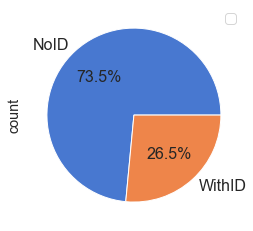

In [78]:
#PSMs per MSMS
fig1, ax1 = plt.subplots()
df2[
    ['Identified Peptide', 'count']
].groupby(
    ['Identified Peptide']
).count().plot(
    kind = 'pie', ax = ax1,
    y = 'count', figsize = (4,4),
    autopct = '%1.1f%%', fontsize = 16
)
fig1.set_facecolor("white")
plt.legend('')

Text(0, 0.5, '')

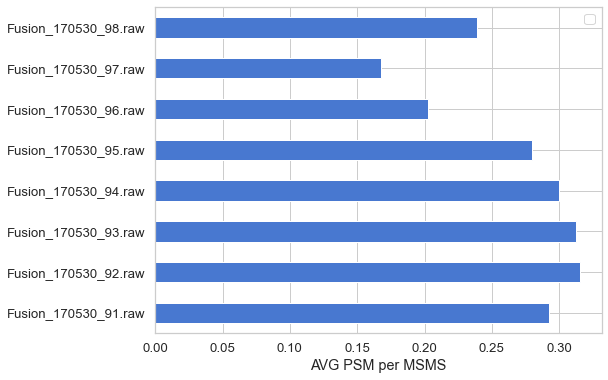

In [79]:
df2[
    ['Spectrum File', 'Number of PSMs']
].groupby(
    ['Spectrum File']
).mean().plot.barh(figsize=(8,6))
plt.legend('')
plt.xlabel('AVG PSM per MSMS')
plt.ylabel('')

Text(0.5, 0.98, 'All MSMS Spectra Per Min Per File / Retention time on x-axis')

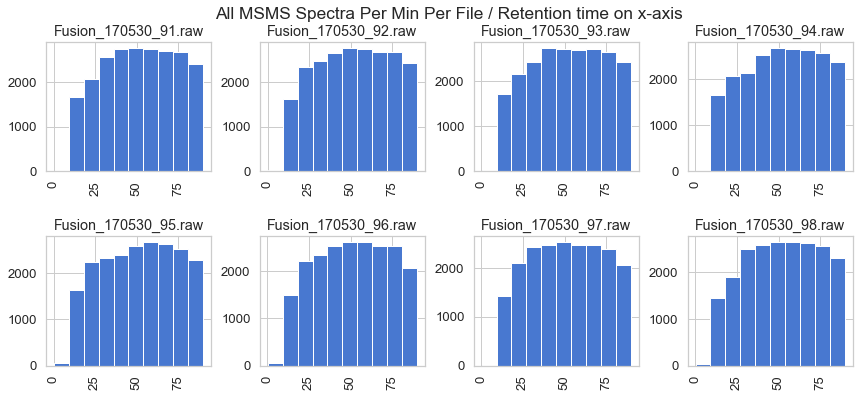

In [85]:
df2[
    ['Spectrum File', 'RT in min']
].hist(
    by='Spectrum File', layout=(2,4), figsize=(14,6)
)
plt.suptitle('All MSMS Spectra Per Min Per File / Retention time on x-axis')
#The spectra are acquired rather uniformly over the LC gradient.

Text(0.5, 0.98, 'Spectra With ID Per Min Per File / Retention time on x-axis')

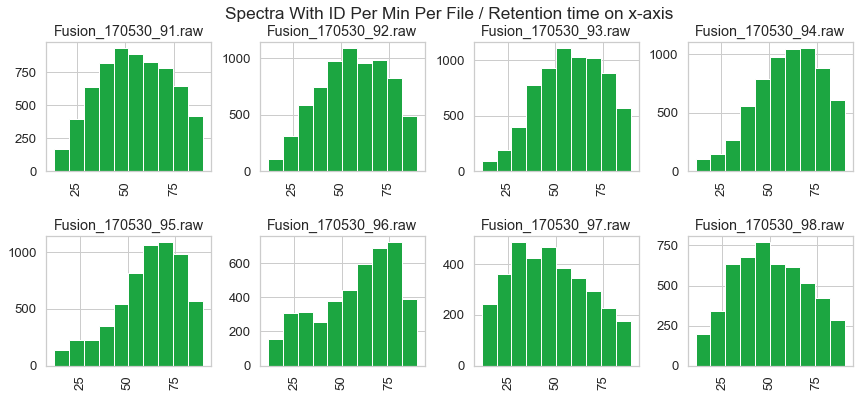

In [87]:
df2[
    df2['Number of PSMs'] > 0
][
    ['Spectrum File', 'RT in min']
].hist(
    by='Spectrum File',layout=(2,4),figsize=(14,6),
    color = '#1ca641'
)
plt.suptitle('Spectra With ID Per Min Per File / Retention time on x-axis')

array([[<AxesSubplot:title={'center':'Isolation Interference in Percent'}>,
        <AxesSubplot:title={'center':'Ion Inject Time in ms'}>]],
      dtype=object)

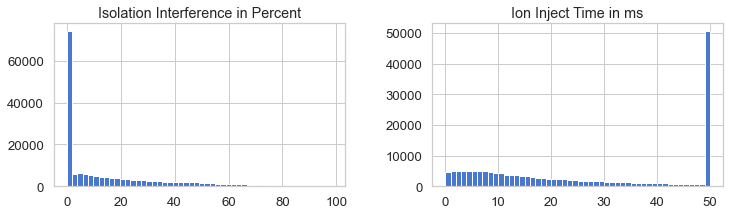

In [88]:
#Isolation interference is the percentage of the ion intensity in the isolation window that does not belong to the "main" precursor in that window.
#Low values mean less probability of co-isolation of two or more peptides that leads to complicated mixture fragmentation spectra.
#Knowing the distribution of the injection times may be useful for tuning the MS method.
df2[
    ['Isolation Interference in Percent', 'Ion Inject Time in ms']
].hist( bins=50, figsize=(12,3) )

In [ ]:
#File QuanSpectra
#Check the distributions of values in the quan channels before and after normalization (done in PD). 

In [6]:
df3 = pd.read_csv(
    os.getcwd() + [ n for n in proteomicTxtFiles if 'QuanSpectra' in n ][0],
    sep='\t'
)
print(df3.shape)
print(df3.columns)
df3.head(3)

(172532, 38)
Index(['Quan Spectra Workflow ID', 'Quan Spectra Spectrum ID', 'Checked',
       'File ID', 'RT in min', 'First Scan', 'Mass Analyzer',
       'Activation Type', 'MS Order', 'Number of PSMs',
       'Isolation Interference in Percent', 'Average Reporter SN',
       'Ion Inject Time in ms', 'Precursor mz in Da', 'Precursor MHplus in Da',
       'Precursor Charge', 'Spectrum File', 'Abundances Normalized 126',
       'Abundances Normalized 127N', 'Abundances Normalized 127C',
       'Abundances Normalized 128N', 'Abundances Normalized 128C',
       'Abundances Normalized 129N', 'Abundances Normalized 129C',
       'Abundances Normalized 130N', 'Abundances Normalized 130C',
       'Abundances Normalized 131', 'Abundance 126', 'Abundance 127N',
       'Abundance 127C', 'Abundance 128N', 'Abundance 128C', 'Abundance 129N',
       'Abundance 129C', 'Abundance 130N', 'Abundance 130C', 'Abundance 131',
       'Quan Info'],
      dtype='object')


,Quan Spectra Workflow ID,Quan Spectra Spectrum ID,Checked,File ID,RT in min,First Scan,Mass Analyzer,Activation Type,MS Order,Number of PSMs,...,Abundance 127N,Abundance 127C,Abundance 128N,Abundance 128C,Abundance 129N,Abundance 129C,Abundance 130N,Abundance 130C,Abundance 131,Quan Info
0,-107,172534,False,F1.1,0.0132,4,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues
1,-107,172535,False,F1.1,0.2764,36,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues
2,-107,172536,False,F1.1,0.9948,120,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues


In [11]:
yes_or_no = lambda x: 'NoID' if x==0 else 'WithID'
df3['Identified Peptide'] = [ yes_or_no( row['Number of PSMs'] ) for _,row in df3.iterrows() ]
df3['Sqrt AVG Reporter SN'] = np.sqrt( df3['Average Reporter SN'] )
df3['Log10 AVG Reporter SN'] = np.log10( df3['Average Reporter SN'].replace(0, np.nan) )
print( [ (i, c) for i, c in enumerate(df3.columns) ] )
df3.head(3)


[(0, 'Quan Spectra Workflow ID'), (1, 'Quan Spectra Spectrum ID'), (2, 'Checked'), (3, 'File ID'), (4, 'RT in min'), (5, 'First Scan'), (6, 'Mass Analyzer'), (7, 'Activation Type'), (8, 'MS Order'), (9, 'Number of PSMs'), (10, 'Isolation Interference in Percent'), (11, 'Average Reporter SN'), (12, 'Ion Inject Time in ms'), (13, 'Precursor mz in Da'), (14, 'Precursor MHplus in Da'), (15, 'Precursor Charge'), (16, 'Spectrum File'), (17, 'Abundances Normalized 126'), (18, 'Abundances Normalized 127N'), (19, 'Abundances Normalized 127C'), (20, 'Abundances Normalized 128N'), (21, 'Abundances Normalized 128C'), (22, 'Abundances Normalized 129N'), (23, 'Abundances Normalized 129C'), (24, 'Abundances Normalized 130N'), (25, 'Abundances Normalized 130C'), (26, 'Abundances Normalized 131'), (27, 'Abundance 126'), (28, 'Abundance 127N'), (29, 'Abundance 127C'), (30, 'Abundance 128N'), (31, 'Abundance 128C'), (32, 'Abundance 129N'), (33, 'Abundance 129C'), (34, 'Abundance 130N'), (35, 'Abundance 1

,Quan Spectra Workflow ID,Quan Spectra Spectrum ID,Checked,File ID,RT in min,First Scan,Mass Analyzer,Activation Type,MS Order,Number of PSMs,...,Abundance 128C,Abundance 129N,Abundance 129C,Abundance 130N,Abundance 130C,Abundance 131,Quan Info,Identified Peptide,Sqrt AVG Reporter SN,Log10 AVG Reporter SN
0,-107,172534,False,F1.1,0.0132,4,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues,NoID,0.0,NaN
1,-107,172535,False,F1.1,0.2764,36,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues,NoID,0.0,NaN
2,-107,172536,False,F1.1,0.9948,120,FourierTransform,HCD,MS3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NoQuanValues,NoID,0.0,NaN


In [12]:
df3['File ID'].unique()

array(['F1.1', 'F1.2', 'F1.3', 'F1.4', 'F1.5', 'F1.6', 'F1.7', 'F1.8'],
      dtype=object)

In [13]:
#Select the columns with normalized abundance
df3.iloc[:,17:27].replace(0, np.nan).dropna(axis='rows').head(3)


,Abundances Normalized 126,Abundances Normalized 127N,Abundances Normalized 127C,Abundances Normalized 128N,Abundances Normalized 128C,Abundances Normalized 129N,Abundances Normalized 129C,Abundances Normalized 130N,Abundances Normalized 130C,Abundances Normalized 131
81,159.0,142.4,127.0,152.5,111.4,109.7,89.3,119.9,118.1,172.9
107,12.7,10.7,7.5,11.5,4.9,13.7,10.9,8.5,11.1,11.6
113,5.2,6.7,3.7,3.4,4.1,5.6,3.6,3.5,3.8,12.6


In [14]:
#Select the columns with non-normalized abundance
df3.iloc[:,27:37].replace(0, np.nan).dropna(axis='rows').head(3)

,Abundance 126,Abundance 127N,Abundance 127C,Abundance 128N,Abundance 128C,Abundance 129N,Abundance 129C,Abundance 130N,Abundance 130C,Abundance 131
81,120.0,124.9,114.0,140.8,94.0,75.1,71.9,119.9,78.6,124.7
107,9.6,9.4,6.7,10.6,4.1,9.4,8.8,8.5,7.4,8.4
113,3.9,5.9,3.3,3.1,3.5,3.8,2.9,3.5,2.5,9.1


Text(0.5, 0.98, 'Set Reporter SN Before and After Normalization')

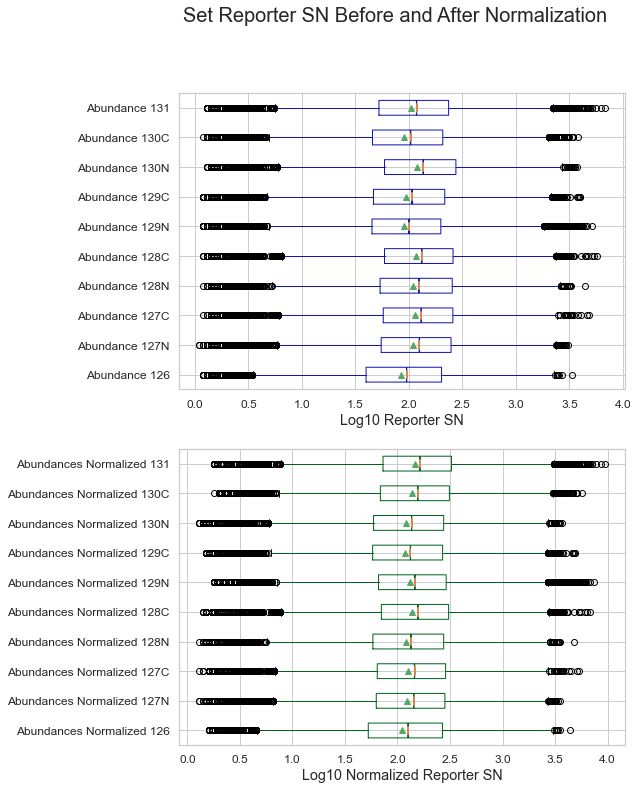

In [15]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(8, 12))

np.log10(
    df3.iloc[
        :, 27:37
    ].replace(0, np.nan).dropna(axis='rows')
).boxplot(
    ax=ax1, notch=True, showmeans=True,
    vert=False,
    boxprops= dict(linewidth=1, color='#1214AD'),
    whiskerprops= dict(color='#1214AD'),
    medianprops= dict(linewidth=2), fontsize=12
)
ax1.set_xlabel('Log10 Reporter SN')
ax2.set_ylabel('')
#Add the box plot after normalization
np.log10(
    df3.iloc[
        :, 17:27
    ].replace(0, np.nan).dropna(axis='rows')
).boxplot(
    ax=ax2, notch=True, showmeans=True,
    vert=False,
    boxprops= dict(linewidth=1, color='#00631C'),
    whiskerprops= dict(color='#00631C'),
    medianprops= dict(linewidth=2), fontsize=12
)
ax2.set_xlabel('Log10 Normalized Reporter SN')
ax2.set_ylabel('')

plt.suptitle('Set Reporter SN Before and After Normalization', fontsize = 20)

In [ ]:
#Using square roots of SN values instead of the log-values helps to preserve zero values and thus give the more complete overview of the intensity distribution. This data set doesn’t have too many zero-intensity spectra, and the median intensities seem to be around a hundred, which is high. At the same time, scales on the y-axes show that many of the high-intensity spectra have no assigned peptide IDs

Text(0.5, 0, 'Square Root of AVG Reporter SN')

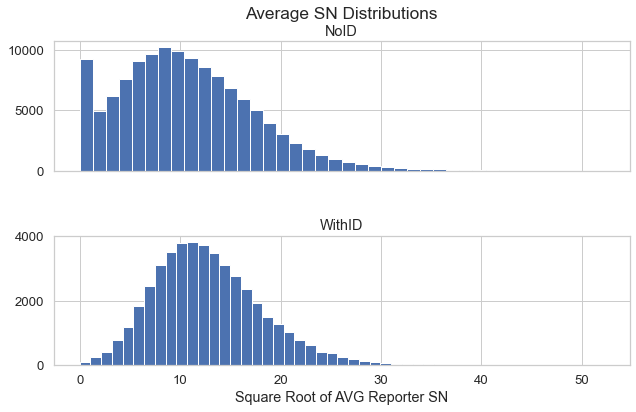

In [16]:
df3[
    ['Identified Peptide', 'Sqrt AVG Reporter SN']
].hist(
    by='Identified Peptide', bins=40, sharex=True,# sharey=True,# log=True,
    layout=(2,1), xrot=0, figsize=(10,6)
)
plt.suptitle('Average SN Distributions')
plt.xlabel('Square Root of AVG Reporter SN')

In [ ]:
#File PSMs

In [17]:
df4 = pd.read_csv(
    os.getcwd() + [ n for n in proteomicTxtFiles if 'PSMs' in n ][0],
    sep='\t'
)
print(df4.shape)
print(df4.columns)
df4.head(3)

(45687, 50)
Index(['PSMs Workflow ID', 'PSMs Peptide ID', 'Checked', 'Confidence',
       'Identifying Node', 'PSM Ambiguity', 'Annotated Sequence',
       'Modifications', 'Number of Proteins', 'Master Protein Accessions',
       'Protein Accessions', 'Number of Missed Cleavages', 'Charge',
       'Delta Score', 'Delta Cn', 'Rank', 'Search Engine Rank', 'mz in Da',
       'MHplus in Da', 'Theo MHplus in Da', 'Delta M in ppm', 'Delta mz in Da',
       'Activation Type', 'MS Order', 'Isolation Interference in Percent',
       'SPS Mass Matches in Percent', 'Average Reporter SN',
       'Ion Inject Time in ms', 'RT in min', 'First Scan', 'Spectrum File',
       'File ID', 'Abundance 126', 'Abundance 127N', 'Abundance 127C',
       'Abundance 128N', 'Abundance 128C', 'Abundance 129N', 'Abundance 129C',
       'Abundance 130N', 'Abundance 130C', 'Abundance 131', 'Quan Info',
       'Ions Score', 'Number of Protein Groups', 'Identity Strict',
       'Identity Relaxed', 'Expectation Value', 

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,Number of Proteins,Master Protein Accessions,...,Abundance 130C,Abundance 131,Quan Info,Ions Score,Number of Protein Groups,Identity Strict,Identity Relaxed,Expectation Value,Percolator q-Value,Percolator PEP
0,-107,8,False,High,Mascot (A5),Unambiguous,[R].lATAAAN.[-],N-Term(TMT6plex),1,P33015,...,969.6,115.4,NaN,31,1,13.0,13.0,0.000145,0.000414,0.001910
1,-107,9,False,High,Mascot (A5),Unambiguous,[R].aGPAGIR.[T],N-Term(TMT6plex),1,P05791,...,147.7,138.4,NaN,33,1,13.0,13.0,0.000101,0.002074,0.042430
2,-107,12,False,High,Mascot (A5),Unambiguous,[R].aGAGLVR.[V],N-Term(TMT6plex),1,P31806,...,169.0,131.6,NaN,41,1,13.0,13.0,0.000015,0.000403,0.001656


Text(0, 0.5, 'Mascot Ion Score')

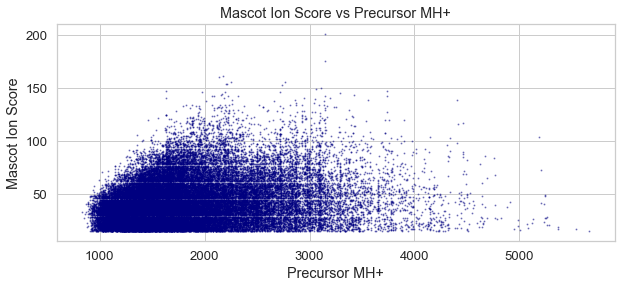

In [18]:
df4.plot.scatter(
    x='MHplus in Da', y='Ions Score', s=1,color='navy', alpha=0.4, figsize=(10, 4)
)
plt.title('Mascot Ion Score vs Precursor MH+')
plt.xlabel('Precursor MH+')
plt.ylabel('Mascot Ion Score')

/var/folders/tx/lt873txs0695kyyx9kbh1gcc0000gn/T/ipykernel_24207/4117125726.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(hb, ax=ax)


Text(0, 0.5, 'Mass error, ppm')

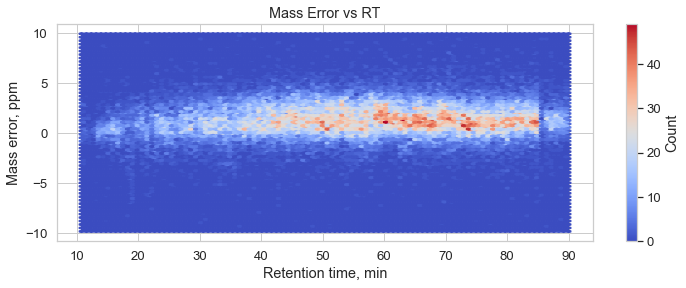

In [20]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12, 4)
hb = ax.hexbin(
    x=df4['RT in min'], y=df4['Delta M in ppm'],
    cmap = 'coolwarm'
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')
plt.title('Mass Error vs RT')
plt.xlabel('Retention time, min')
plt.ylabel('Mass error, ppm')

In [ ]:
# File PeptideGroups
# Relative standard deviation (RSD) of quantitative values for peptides within each protein

In [22]:
df5 = pd.read_csv(
        os.getcwd() + [ n for n in proteomicTxtFiles if 'PeptideGroups' in n ][0],
    sep='\t'
)
print(df5.shape)
print(df5.columns)
df5.head(3)

(25794, 49)
Index(['Peptide Groups Peptide Group ID', 'Checked', 'Confidence',
       'Annotated Sequence', 'Modifications', 'Qvality PEP', 'Qvality q-value',
       'Number of Protein Groups', 'Number of Proteins', 'Number of PSMs',
       'Master Protein Accessions', 'Positions in Master Proteins',
       'Modifications in Master Proteins', 'Number of Missed Cleavages',
       'Theo MHplus in Da', 'Abundance Ratio S02  S01',
       'Abundance Ratio S03  S01', 'Abundance Ratio S04  S01',
       'Abundance Ratio S05  S01', 'Abundance Ratio S06  S01',
       'Abundance Ratio S07  S01', 'Abundance Ratio S08  S01',
       'Abundance Ratio S09  S01', 'Abundance Ratio S10  S01',
       'Abundances Grouped S01', 'Abundances Grouped S02',
       'Abundances Grouped S03', 'Abundances Grouped S04',
       'Abundances Grouped S05', 'Abundances Grouped S06',
       'Abundances Grouped S07', 'Abundances Grouped S08',
       'Abundances Grouped S09', 'Abundances Grouped S10', 'Quan Info',
       'F

,Peptide Groups Peptide Group ID,Checked,Confidence,Annotated Sequence,Modifications,Qvality PEP,Qvality q-value,Number of Protein Groups,Number of Proteins,Number of PSMs,...,Found in Sample in S5 F1 128C Sample S05,Found in Sample in S6 F1 129N Sample S06,Found in Sample in S7 F1 129C Sample S07,Found in Sample in S8 F1 130N Sample S08,Found in Sample in S9 F1 130C Sample S09,Found in Sample in S10 F1 131 Sample S10,Confidence by Search Engine Mascot,Percolator q-Value by Search Engine Mascot,Percolator PEP by Search Engine Mascot,Ions Score by Search Engine Mascot
0,1,False,High,[R].AAAAEIAVK.[T],1xTMT6plex [K9]; 1xTMT6plex [N-Term],0.000219,0.000121,1,1,1,...,High,High,High,High,High,High,High,0.000347,0.000506,66
1,3,False,High,[R].AAAAQQAGLK.[L],1xTMT6plex [K10]; 1xTMT6plex [N-Term],0.000094,0.000076,1,1,1,...,High,High,High,High,High,High,High,0.000297,0.000374,66
2,4,False,High,[R].AAADEWDER.[-],1xTMT6plex [N-Term],0.000327,0.000121,1,1,4,...,High,High,High,High,High,High,High,0.000351,0.000606,46


In [23]:
#Find columns that contain abundance ratios
df5.iloc[:, 15:24].dropna(axis='rows')

,Abundance Ratio S02 S01,Abundance Ratio S03 S01,Abundance Ratio S04 S01,Abundance Ratio S05 S01,Abundance Ratio S06 S01,Abundance Ratio S07 S01,Abundance Ratio S08 S01,Abundance Ratio S09 S01,Abundance Ratio S10 S01
0,1.396,2.063,0.987,1.946,2.244,2.897,1.987,2.277,0.737
1,0.964,1.327,0.983,1.054,1.401,1.271,1.486,1.328,0.824
2,1.045,1.604,0.985,1.514,1.474,2.200,1.688,1.724,1.245
3,1.076,2.016,1.003,1.182,1.290,1.415,1.456,1.329,0.964
4,0.647,0.549,1.003,0.662,0.454,0.582,0.592,0.700,0.918
...,...,...,...,...,...,...,...,...,...
25789,1.455,1.248,0.882,1.748,0.952,1.859,2.188,2.893,1.154
25790,1.237,0.806,1.046,1.092,0.951,1.294,1.412,1.433,1.092
25791,0.992,0.269,0.941,0.127,0.163,0.417,0.381,0.766,1.094
25792,0.875,0.325,0.970,0.082,0.166,0.309,0.353,0.639,1.005


In [ ]:
#In the simplest scenario, we expect peptides originating from a protein to repeat the quantitative profile of that protein. High coefficient of variance for peptides within most proteins across the data set may be an evidence of low signal intensity (and, thus, high relative noise level).
#In this case,mean and median RSDs for different samples fall between 8 and 19%, which is quite reasonable

In [31]:
def variability_groupby(df, ratio_columns, accession_col='Accession',
                          use_peptides='all',shared_keyword='Shared', unique_infocol='Quan Info'):
    if use_peptides == 'unique':
        df = df[~df[unique_infocol].isin((shared_keyword,))].copy()
    elif use_peptides == 'all':
        pass
    else:
        df = None
        
    dfN = df[ ([accession_col,] + ratio_columns) ]
    
    dfMeans = dfN.groupby([accession_col]).mean()
    dfDev = dfN.groupby([accession_col]).std()
    dfVar = np.divide(dfDev, dfMeans)
    dfVar = dfVar*100
    dfVar.replace(0, np.nan, inplace=True)
    dfVar = dfVar.round(2)
    
    return dfVar
    

dfPeptVar = variability_groupby(
    df5[(['Accession', ] + list(df5.columns[15:24]) ) ].dropna(axis='rows'),
    ratio_columns = list( df5.columns[15:24] )
)
print(dfPeptVar.head(3))
np.log10(
    dfPeptVar.replace(0, np.nan)
).boxplot(
    figsize=(10,5),
    notch=True, showmeans=True, vert=False,
    medianprops= dict(linewidth=2), fontsize=12
)
plt.title(f'{PNUM} Peptide Variability (%) Within Proteins', fontsize=18)
plt.xlabel('Log10 Peptide Variability (%)', fontsize=12)

KeyError: "['Accession'] not in index"

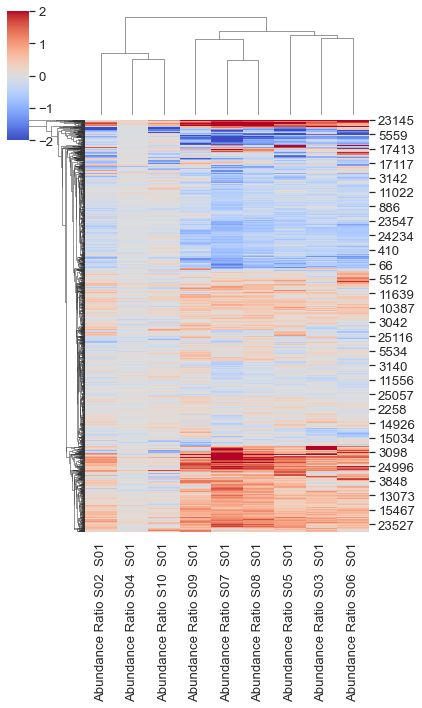

In [38]:
df5['Cys_Peptide'] = [
    'Yes' if '[C' in x else 'No' for x in df5['Modifications']
]
sns.clustermap(
    np.log2(
        df5[
            df5['Cys_Peptide'] == 'Yes'
        ].iloc[
            :, 15:24
        ].dropna(axis='rows')
    ),
    figsize=(6,10),
    cmap='coolwarm', vmin=-2, vmax=2
)

In [ ]:
#In this case, different peptides have various abundance profiles, but there are no samples that would have low abundance of cysteine-containing peptides on the scale of the whole sample

In [ ]:
#File Proteins

In [40]:
df6 = pd.read_csv(
    os.getcwd() + [ n for n in proteomicTxtFiles if 'Proteins' in n ][0],
    sep='\t'
)
def get_gene_name(descr):
    try:
        gn = descr.split('GN=')[1]
        gn = gn.split(' ')[0]
    except:
        gn = ''
    return gn

df6['Gene'] = [ get_gene_name(x) for x in df6['Description'] ]
print(df6.shape)
print(df6.columns)
df6.head(3)

(2704, 49)
Index(['Proteins Unique Sequence ID', 'Checked',
       'Protein FDR Confidence Combined', 'Master', 'Accession', 'Description',
       'Exp q-value Combined', 'Sum PEP Score', 'Coverage in Percent',
       'Number of Peptides', 'Number of PSMs', 'Number of Unique Peptides',
       'Number of AAs', 'MW in kDa', 'calc pI', 'Score Mascot Mascot',
       'Number of Peptides by Search Engine Mascot',
       'Abundance Ratio S02  S01', 'Abundance Ratio S03  S01',
       'Abundance Ratio S04  S01', 'Abundance Ratio S05  S01',
       'Abundance Ratio S06  S01', 'Abundance Ratio S07  S01',
       'Abundance Ratio S08  S01', 'Abundance Ratio S09  S01',
       'Abundance Ratio S10  S01', 'Abundances Grouped S01',
       'Abundances Grouped S02', 'Abundances Grouped S03',
       'Abundances Grouped S04', 'Abundances Grouped S05',
       'Abundances Grouped S06', 'Abundances Grouped S07',
       'Abundances Grouped S08', 'Abundances Grouped S09',
       'Abundances Grouped S10', 'Found 

,Proteins Unique Sequence ID,Checked,Protein FDR Confidence Combined,Master,Accession,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,...,Found in Sample in S4 F1 128N Sample S04,Found in Sample in S5 F1 128C Sample S05,Found in Sample in S6 F1 129N Sample S06,Found in Sample in S7 F1 129C Sample S07,Found in Sample in S8 F1 130N Sample S08,Found in Sample in S9 F1 130C Sample S09,Found in Sample in S10 F1 131 Sample S10,Number of Protein Groups,Modifications,Gene
0,-9221854764723615317,False,High,IsMasterProtein,P0AE52,Peroxiredoxin Bcp OS=Escherichia coli (strain ...,0.0,37.669,56,9,...,High,High,High,High,High,High,High,1,Methylthio [C46; C51],bcp
1,-9211239412768113427,False,High,IsMasterProtein,P22333,Adenosine deaminase OS=Escherichia coli (strai...,0.0,32.732,26,8,...,High,High,High,High,High,High,High,1,Methylthio [C76],add
2,-9209034104888575193,False,High,IsMasterProtein,P0A901,Outer membrane lipoprotein Blc OS=Escherichia ...,0.0,18.184,31,6,...,High,High,High,High,High,High,High,1,NaN,blc


In [41]:
def pca_on_columns(in_df, plotname, nComp=5, compToPlot=(0,1), figWidth = 8 ):
    """
    Takes an expression table, with samples as columns and proteins in rows.
    Figure width is set by the user,
    figure height is derived automatically based on the scale of the PCs. 
    """
    
    samplenames = list(in_df.columns)
    logdata = in_df.to_numpy()

    X = logdata.transpose()

    pca = PCA(n_components=nComp, svd_solver='arpack')
    principalComponents = pca.fit_transform(X)
    
    print('Variance explained by components:')
    print(pca.explained_variance_ratio_)
    
    pcaLoadings = pd.DataFrame(pca.components_.T,
                               columns=[ f'PC{n+1}' for n in range(nComp) ],
                               index=in_df.index)
    
    pcColnames = []
    for n in range(nComp):
        pcColnames.append( f'PC {n+1} ({pca.explained_variance_ratio_[n]*100:.2f}%)' )

    principalDf = pd.DataFrame(principalComponents,
                               columns = pcColnames)
    principalDf['sample'] = samplenames
    principalDf.set_index('sample', inplace = True)
    
    #Find min and max values on x and y axes in order to detrmine the figsize
    arrX = principalDf[ pcColnames[ compToPlot[0] ] ]
    arrY = principalDf[ pcColnames[ compToPlot[1] ] ]
    spanX = max(arrX) - min(arrX)
    spanY = max(arrY) - min(arrY)
    plotH = round(figWidth * spanY / spanX, 1)
    print(f'Figure width set to {figWidth} and height to {plotH}')
    
    f = plt.figure()
    f.patch.set_facecolor('white')
    ax1 = principalDf.plot.scatter(x=pcColnames[ compToPlot[0] ],
                                   y=pcColnames[ compToPlot[1] ],
                                   color='#213A8F',
                                   s=50, alpha=0.7, figsize=(figWidth, plotH) )
    ax1.axhline(color='grey', alpha=0.4, linestyle='--')
    ax1.axvline(color='grey', alpha=0.4, linestyle='--')
    
    for i, row in principalDf.iloc[:, list(compToPlot) ].iterrows():
        ax1.annotate(i, row,
                     xytext=(10,-5), textcoords='offset points',
                     fontsize=12, color='#213A8F')
    ax1.set_title(plotname, fontsize=16)
    plt.grid(b=None)
    
    #plt.show()

    return principalDf, pcaLoadings


In [47]:
df6 = df6[ ~df6['Accession'].str.contains('cont_') ]
df6 = df6[
    ( df6['Master'] == 'IsMasterProtein' )
]
df6.set_index('Accession', inplace=True)
print(df6.shape)
df6.head(3)


pca_coords, loadings = pca_on_columns(
    np.log2(
        df6.iloc[:, 16:25].dropna(axis='rows')
    ),
    'PCA on Proteins', figWidth = 8
)

KeyError: 'Accession'